<a href="https://colab.research.google.com/github/sonjoy1s/kaggle_project/blob/main/Customer_Churn_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
# Kaggle Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
#from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [200]:
df = pd.read_csv("/content/customer_churn_dataset.csv")
df.head()

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54.20,2818.40,Month-to-month,Credit,DSL,No,Yes,1,No
1,2,15,35.28,529.20,Month-to-month,Debit,DSL,No,No,2,No
2,3,72,78.24,5633.28,Month-to-month,Debit,DSL,No,No,0,No
3,4,61,80.24,4894.64,One year,Cash,Fiber,Yes,Yes,0,No
4,5,21,39.38,826.98,Month-to-month,UPI,Fiber,No,No,4,Yes


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       20000 non-null  int64  
 1   tenure            20000 non-null  int64  
 2   monthly_charges   20000 non-null  float64
 3   total_charges     20000 non-null  float64
 4   contract          20000 non-null  object 
 5   payment_method    20000 non-null  object 
 6   internet_service  17987 non-null  object 
 7   tech_support      20000 non-null  object 
 8   online_security   20000 non-null  object 
 9   support_calls     20000 non-null  int64  
 10  churn             20000 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.7+ MB


In [202]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,20000.0,10000.500000,5773.647028,1.00,5000.7500,10000.500,15000.2500,20000.00
tenure,20000.0,36.467450,20.773984,1.00,18.0000,36.000,54.0000,72.00
monthly_charges,20000.0,70.010531,28.890239,20.00,45.2100,70.090,95.0725,120.00
total_charges,20000.0,2543.979209,1882.949804,20.23,1045.8375,2096.495,3690.3375,8629.92
support_calls,20000.0,1.512550,1.235240,0.00,1.0000,1.000,2.0000,8.00


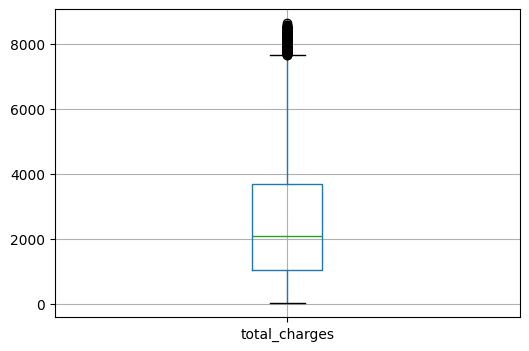

In [203]:
plt.figure(figsize=(6,4))
df.boxplot(column='total_charges')
plt.show()

In [204]:
df['internet_service'] = df['internet_service'].fillna(
    df['internet_service'].mode())[0]

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       20000 non-null  int64  
 1   tenure            20000 non-null  int64  
 2   monthly_charges   20000 non-null  float64
 3   total_charges     20000 non-null  float64
 4   contract          20000 non-null  object 
 5   payment_method    20000 non-null  object 
 6   internet_service  20000 non-null  object 
 7   tech_support      20000 non-null  object 
 8   online_security   20000 non-null  object 
 9   support_calls     20000 non-null  int64  
 10  churn             20000 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.7+ MB


In [206]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['churn'] = le.fit_transform(df['churn'])
df['internet_service'] = le.fit_transform(df['internet_service'])
df['tech_support'] = le.fit_transform(df['tech_support'])
df['online_security'] = le.fit_transform(df['online_security'])


In [207]:
df.head()

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54.20,2818.40,Month-to-month,Credit,0,0,1,1,0
1,2,15,35.28,529.20,Month-to-month,Debit,0,0,0,2,0
2,3,72,78.24,5633.28,Month-to-month,Debit,0,0,0,0,0
3,4,61,80.24,4894.64,One year,Cash,0,1,1,0,0
4,5,21,39.38,826.98,Month-to-month,UPI,0,0,0,4,1


In [208]:
df.drop(columns=['customer_id'],inplace=True)

In [209]:
df.head()

,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,52,54.20,2818.40,Month-to-month,Credit,0,0,1,1,0
1,15,35.28,529.20,Month-to-month,Debit,0,0,0,2,0
2,72,78.24,5633.28,Month-to-month,Debit,0,0,0,0,0
3,61,80.24,4894.64,One year,Cash,0,1,1,0,0
4,21,39.38,826.98,Month-to-month,UPI,0,0,0,4,1


In [210]:
corr_relation = df.select_dtypes(include=[np.number]).corr()['churn'].sort_values(ascending=False)
corr_relation

,churn
churn,1.000000
monthly_charges,0.244723
support_calls,0.196719
total_charges,0.066156
online_security,0.006355
tenure,-0.087630
tech_support,-0.206905
internet_service,NaN


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            20000 non-null  int64  
 1   monthly_charges   20000 non-null  float64
 2   total_charges     20000 non-null  float64
 3   contract          20000 non-null  object 
 4   payment_method    20000 non-null  object 
 5   internet_service  20000 non-null  int64  
 6   tech_support      20000 non-null  int64  
 7   online_security   20000 non-null  int64  
 8   support_calls     20000 non-null  int64  
 9   churn             20000 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.5+ MB


In [212]:
df_log = df.copy()
df_log['total_charges_log'] = np.log(df_log['total_charges'])

In [213]:
df_log.head()

,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn,total_charges_log
0,52,54.20,2818.40,Month-to-month,Credit,0,0,1,1,0,7.943925
1,15,35.28,529.20,Month-to-month,Debit,0,0,0,2,0,6.271366
2,72,78.24,5633.28,Month-to-month,Debit,0,0,0,0,0,8.636447
3,61,80.24,4894.64,One year,Cash,0,1,1,0,0,8.495896
4,21,39.38,826.98,Month-to-month,UPI,0,0,0,4,1,6.717781


In [214]:
df_log.drop(columns=['total_charges'],inplace=True)

In [215]:
df_log.head()

,tenure,monthly_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn,total_charges_log
0,52,54.20,Month-to-month,Credit,0,0,1,1,0,7.943925
1,15,35.28,Month-to-month,Debit,0,0,0,2,0,6.271366
2,72,78.24,Month-to-month,Debit,0,0,0,0,0,8.636447
3,61,80.24,One year,Cash,0,1,1,0,0,8.495896
4,21,39.38,Month-to-month,UPI,0,0,0,4,1,6.717781


In [216]:
X = df_log.drop(columns=['churn'],axis=1)
y = df_log['churn']

In [217]:
numerical_col = X.select_dtypes(include=[np.number]).columns
print(numerical_col)

categorical_col = X.select_dtypes(exclude=[np.number]).columns
print(categorical_col)

Index(['tenure', 'monthly_charges', 'internet_service', 'tech_support',
       'online_security', 'support_calls', 'total_charges_log'],
      dtype='object')
Index(['contract', 'payment_method'], dtype='object')


In [218]:
#numerical_col_pipe
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
numerical_pipe = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
    ]

)

In [219]:
# Categorical_col_pipe
from sklearn.preprocessing import OneHotEncoder
categorical_pipe = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('encoder',OneHotEncoder())
    ]
)

In [220]:
#Combine num and cat
from sklearn.compose import ColumnTransformer
com_processor = ColumnTransformer(
    transformers=[
        ('num',numerical_pipe,numerical_col),
        ('cat',categorical_pipe,categorical_col)
    ]
)



In [221]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)


In [222]:
# Base learning
lr = LogisticRegression(max_iter=100,random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100,random_state=42)
gb = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,random_state=42)
xgb = XGBClassifier()


In [223]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier
voting_cls = VotingClassifier(
    estimators=[
        ('lr',lr),
        ('dt',dt),
        ('rf',rf),
        ('gb',gb),
        ('xgb',xgb)
    ]
)

In [224]:
#staking
from sklearn.ensemble import StackingClassifier
staking_cls = StackingClassifier(
    estimators=[
        ('lr',lr),
        ('dt',dt),
        ('rf',rf),
        ('gb',gb),
        ('xgb',xgb)
    ]
)

In [225]:
model_train ={
    'Logistic Regression':lr,
    'Random Forest':rf,
    'Gradient Boosting':gb,
    'XGBoost':xgb,
    'Voting Classifier':voting_cls,
    'Stacking Classifier':staking_cls
}

In [226]:
results = []
for model_name, model in model_train.items():
  print(f"--- Training and Evaluating {model_name} ---")
  pipe = Pipeline(
      steps=[
          ('combine', com_processor),
          ('model', model)
      ]
  )
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)

  results.append({
      'model_name': model_name,
      'accuracy': accuracy,
      'classification_report': report,
      'confusion_matrix': cm
  })
  print(f"Accuracy for {model_name}: {accuracy:.4f}")
  print(f"Classification Report for {model_name}:\n{report}")
  print(f"Confusion Matrix for {model_name}:\n{cm}\n")

print("\n--- All Model Results Summary ---")
for res in results:
    print(f"Model: {res['model_name']}, Accuracy: {res['accuracy']:.4f}")

--- Training and Evaluating Logistic Regression ---
Accuracy for Logistic Regression: 0.7947
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      2631
           1       0.78      0.56      0.65      1369

    accuracy                           0.79      4000
   macro avg       0.79      0.74      0.75      4000
weighted avg       0.79      0.79      0.78      4000

Confusion Matrix for Logistic Regression:
[[2415  216]
 [ 605  764]]

--- Training and Evaluating Random Forest ---
Accuracy for Random Forest: 0.8237
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2631
           1       0.80      0.64      0.71      1369

    accuracy                           0.82      4000
   macro avg       0.82      0.78      0.79      4000
weighted avg       0.82      0.82      0.82      4000

Confusion Matr